In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
basepath = "v3"

In [3]:
df = []
for fn in [fn for fn in os.listdir(basepath) if fn.endswith("config_scores.csv")]:
    emb_name = fn[:-len("_config_scores.csv")]
    df.append(pd.read_csv(os.path.join(basepath, fn), index_col=0).assign(embedding=emb_name))
df = pd.concat(df)

In [4]:
df.head()

,hidden_size,n_hidden_layers,dropout,loss,embedding
0,16,1,0.0,0.019804,scgpt-70m-2048_cf
1,16,1,0.1,0.020032,scgpt-70m-2048_cf
2,16,1,0.5,0.019821,scgpt-70m-2048_cf
3,16,2,0.0,0.019218,scgpt-70m-2048_cf
4,16,2,0.1,0.019882,scgpt-70m-2048_cf


In [5]:
df["config"] = df.hidden_size.astype(str) + "|" + df.n_hidden_layers.astype(str) + "|" + df.dropout.astype(str)

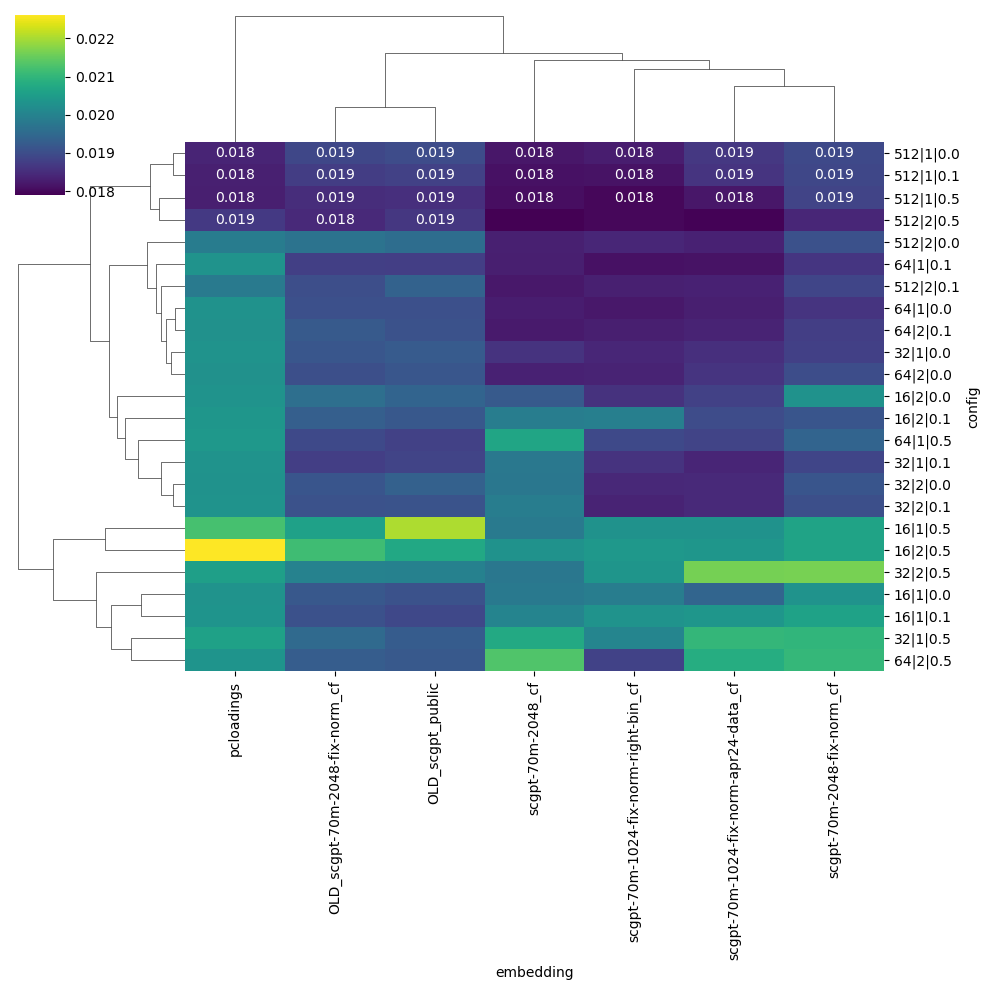

In [6]:
sns.clustermap(df.pivot(index="config", columns="embedding", values="loss"), cmap="viridis", annot=True)

<Axes: xlabel='embedding', ylabel='config'>

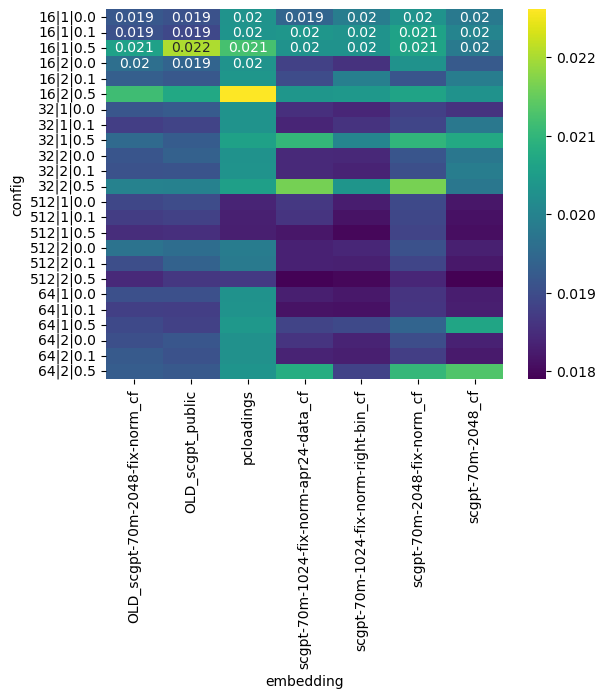

In [7]:
sns.heatmap(data=df.pivot(index="config", columns="embedding", values="loss"), cmap="viridis", annot=True)

<Axes: xlabel='embedding', ylabel='config'>

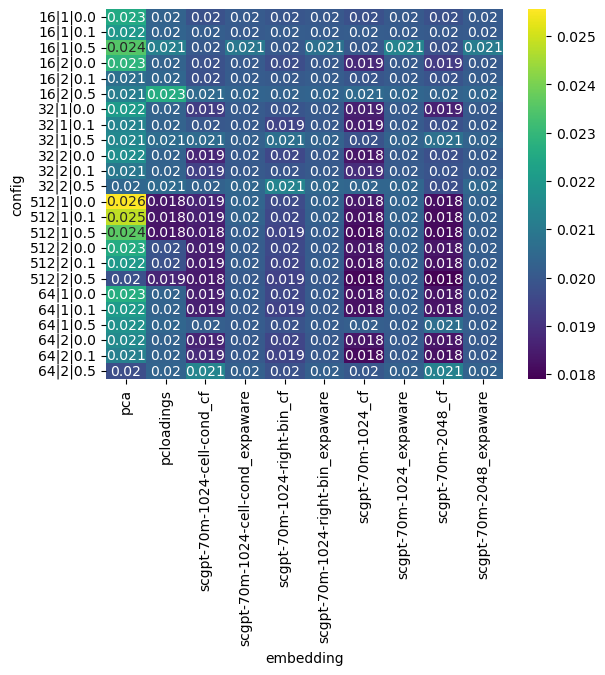

In [9]:
sns.heatmap(data=df.pivot(index="config", columns="embedding", values="loss"), cmap="viridis", annot=True)

In [8]:
df.groupby("embedding").apply(lambda edf: edf.loc[edf.loss.idxmin()])

/tmp/ipykernel_991754/604645259.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("embedding").apply(lambda edf: edf.loc[edf.loss.idxmin()])


,hidden_size,n_hidden_layers,dropout,loss,embedding,config
embedding,,,,,,
OLD_scgpt-70m-2048-fix-norm_cf,512,2,0.5,0.018447,OLD_scgpt-70m-2048-fix-norm_cf,512|2|0.5
OLD_scgpt_public,512,1,0.5,0.018527,OLD_scgpt_public,512|1|0.5
pcloadings,512,1,0.5,0.018302,pcloadings,512|1|0.5
scgpt-70m-1024-fix-norm-apr24-data_cf,512,2,0.5,0.017932,scgpt-70m-1024-fix-norm-apr24-data_cf,512|2|0.5
scgpt-70m-1024-fix-norm-right-bin_cf,512,1,0.5,0.017983,scgpt-70m-1024-fix-norm-right-bin_cf,512|1|0.5
scgpt-70m-2048-fix-norm_cf,512,2,0.5,0.018409,scgpt-70m-2048-fix-norm_cf,512|2|0.5
scgpt-70m-2048_cf,512,2,0.5,0.017902,scgpt-70m-2048_cf,512|2|0.5
